In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
flightdata = pd.read_csv("flightdatatotest.csv")
flightdata

,sensor,file number,timestamp,lowg.ax,lowg.ay,lowg.az,highg.ax,highg.ay,highg.az,barometer.temperature,...,kalman.acceleration.ay,kalman.acceleration.az,kalman.altitude,pyro.is_global_armed,pyro.channel_firing[0],pyro.channel_firing[1],pyro.channel_firing[2],pyro.channel_firing[3],cameradata.camera_state,cameradata.camera_voltage
0,kalman,0,2520689,0.051772,1.017073,0.002929,0.990234,-0.011719,-0.039063,21.88,...,0.000000,0.000000,0,1,0,0,0,0,255,0
1,lowg,0,2520692,0.052896,1.017549,0.003444,0.990234,-0.011719,-0.039063,21.88,...,0.000000,0.000000,0,1,0,0,0,0,255,0
2,lowglsm,0,2520692,0.052896,1.017549,0.003444,0.990234,-0.011719,-0.039063,21.88,...,0.000000,0.000000,0,1,0,0,0,0,255,0
3,highg,0,2520692,0.052896,1.017549,0.003444,1.013672,-0.042969,-0.058594,21.88,...,0.000000,0.000000,0,1,0,0,0,0,255,0
4,lowg,0,2520697,0.051242,1.017510,0.003931,1.013672,-0.042969,-0.058594,21.88,...,0.000000,0.000000,0,1,0,0,0,0,255,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118660,highg,0,2665757,0.588569,0.012371,0.824979,-0.009766,-0.539062,0.812500,21.50,...,-6.122657,7.280474,0,1,0,0,0,0,255,0
118661,fsm,0,2665758,0.588569,0.012371,0.824979,-0.009766,-0.539062,0.812500,21.50,...,-6.122657,7.280474,0,1,0,0,0,0,255,0
118662,pyro,0,2665758,0.588569,0.012371,0.824979,-0.009766,-0.539062,0.812500,21.50,...,-6.122657,7.280474,0,1,0,0,0,0,255,0
118663,kalman,0,2665759,0.588569,0.012371,0.824979,-0.009766,-0.539062,0.812500,21.50,...,-6.179939,7.306360,0,1,0,0,0,0,255,0


From reading Telemega documentation, there is no mention of Kalman filter for the rotational data. I think we have to assume that this is unfiltered data. 
[Telemega](https://altusmetrum.org/AltOS/doc/telemetry.html#_telemega_sensor_data)
Do we 

In [9]:
telemegadata = pd.read_csv("TeleMega (AL3, EEPROM).csv")
print(telemegadata.columns.tolist())
telemegadata

['#version', 'serial', 'flight', 'call', 'time', 'state', 'state_name', 'acceleration', 'pressure', 'altitude', 'height', 'speed', 'temperature', 'drogue_voltage', 'main_voltage', 'battery_voltage', 'accel_x', 'accel_y', 'accel_z', 'gyro_roll', 'gyro_pitch', 'gyro_yaw', 'mag_x', 'mag_y', 'mag_z', 'tilt', 'pyro', 'igniter_a', 'igniter_b', 'igniter_c', 'igniter_d', 'connected', 'locked', 'nsat', 'latitude', 'longitude', 'altitude.1', 'year', 'month', 'day', 'hour', 'minute', 'second', 'pad_dist', 'pad_range', 'pad_az', 'pad_el', 'pdop', 'hdop', 'vdop', 'sat01', 'sat02', 'sat03', 'sat04', 'sat05', 'sat06', 'sat07', 'sat08', 'sat09', 'sat10', 'sat11', 'sat12', 'sat13', 'sat14', 'sat15', 'sat16', 'sat17', 'sat18', 'sat19', 'sat20', 'sat21', 'sat22', 'sat23', 'sat24', 'sat25', 'sat26', 'sat27', 'sat28', 'sat29', 'sat30', 'sat31', 'sat32']


,#version,serial,flight,call,time,state,state_name,acceleration,pressure,altitude,...,sat23,sat24,sat25,sat26,sat27,sat28,sat29,sat30,sat31,sat32
0,6,11047,5,KE9CTZ,-0.30,3,boost,-1.01,100225.0,91.97,...,0,0,0,30,25,39,27,0,35,22
1,6,11047,5,KE9CTZ,-0.29,3,boost,-0.00,100225.0,91.97,...,0,0,0,30,25,39,27,0,35,22
2,6,11047,5,KE9CTZ,-0.28,3,boost,-0.50,100225.0,91.97,...,0,0,0,30,25,39,27,0,35,22
3,6,11047,5,KE9CTZ,-0.27,3,boost,-0.00,100227.0,91.80,...,0,0,0,30,25,39,27,0,35,22
4,6,11047,5,KE9CTZ,-0.26,3,boost,-2.51,100227.0,91.80,...,0,0,0,30,25,39,27,0,35,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3716,6,11047,5,KE9CTZ,150.10,7,main,-10.56,100261.0,88.95,...,0,0,0,35,16,32,28,0,32,0
3717,6,11047,5,KE9CTZ,150.11,7,main,-9.05,100260.0,89.03,...,0,0,0,35,16,32,28,0,32,0
3718,6,11047,5,KE9CTZ,150.21,7,main,-12.07,100258.0,89.20,...,0,0,0,35,16,32,28,0,32,0
3719,6,11047,5,KE9CTZ,150.31,7,main,-9.56,100259.0,89.12,...,0,0,0,35,16,32,28,0,32,0


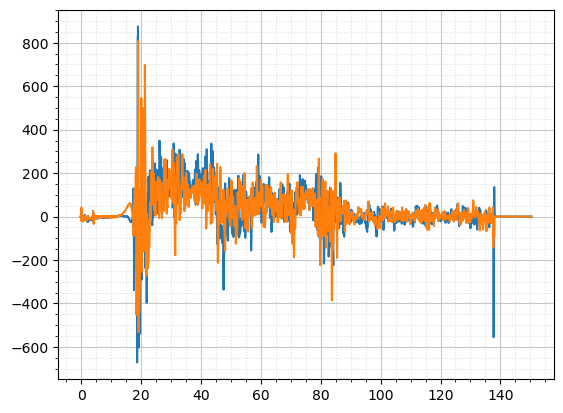

In [ ]:
plt.plot(telemegadata['time'], telemegadata['gyro_roll'],label='Tmega Roll')
plt.plot(telemegadata['time'], telemegadata['gyro_yaw'],label='Tmega Yaw')
plt.plot(telemegadata['time'], telemegadata['gyro_pitch'],label='Tmega Pitch')
plt.grid(True,which='major',linestyle='-',alpha=0.7)
plt.minorticks_on()
plt.grid(True,which='minor',linestyle=':',alpha=0.4)
plt.xlabel('Time (s)')
# plt.ylabel('Angular Rotation (deg/s^2)')